#### How many people live around the Lake of Constance?

A friend wanted to know how many people live around the Lake of Constance. We added up the approximate population of the larger cities at the lake's shore and concluded it to be around a million. As this is not a very satisfying answer, let's try to find ways to get closer to the 'thruth'.

Some preliminary thoughts:
* who counts as 'Bodenseemensch'?
    * residents of the municipalities that are bordering the lake
        * what about Zweitwohnungen? There are quite a few in the area
    * residents of municipalities within a radius X around the lake
    * include travel time to the lake (e.g. 30min travel time counts as Bodenseemensch)
        * by foot/bike/public transport/car
* where to get the data from?
    * Wikipedia
        * manually (no!)
            * administrative areas: Konstanz, Bodenseekreis, Lindau, Voralrberg, St. Gallen, Thurgau, Schaffhausen
            * [Wikipedia](https://de.wikipedia.org/wiki/Untersee_(Bodensee))
                * 'Badische Anrainergemeinden sind Öhningen, Gaienhofen, Moos, Radolfzell, Reichenau, Allensbach und Konstanz, ostschweizerische Gottlieben, Ermatingen, Salenstein, Berlingen, Steckborn, Mammern, Eschenz und Stein am Rhein.'
                * 
        * scraping
    * Zensus2022?
    * Destatis?
        * [Statistikportal](https://www.statistikportal.de/de/gemeindeverzeichnis) even lists gender of inhabitants
    * Global Human Settlement Layer from EU [GHSL-POP](https://ghsl.jrc.ec.europa.eu/download.php?ds=pop)
        * found in Johannes Moser's [blog](https://urbanjohannesmoser.wordpress.com/2022/07/28/what-share-of-germanys-population-can-you-reach-using-only-the-intercityexpress-ice-and-15-minutes-on-your-bicycle/)
* where does the lake end (and the Rhine river begin)?
    * 'Die Rheinbrücke Stein am Rhein markiert den Grenzpunkt zwischen dem Untersee bzw. Rheinsee und Hochrhein', see [here](https://de.wikipedia.org/wiki/Untersee_(Bodensee))

In [2]:
# !pip install rasterio

     |████████████████████████████████| 22.9 MB 1.7 MB/s eta 0:00:01


In [22]:
# import rasterio
# import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt

In [ ]:
path = '/Users/nf/docs/uni/DataStuff/Spatial/Map-Magic/data/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R4_C19/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R4_C19.tif'

In [28]:
ghs_pop = rasterio.open(path, driver="GTiff")
#left edge
print(dataset.bounds)

BoundingBox(left=-41000.0, bottom=5000000.0, right=959000.0, top=6000000.0)


In [21]:
with rasterio.open(path) as src:
    print('src width = ', src.width,', src height = ', src.height)
    print('crs = ',src.crs)
    print('transform =',src.transform)
    print('count =', src.count)
    print('indexes = ',src.indexes)

src width =  10000 , src height =  10000
crs =  ESRI:54009
transform = | 100.00, 0.00,-41000.00|
| 0.00,-100.00, 6000000.00|
| 0.00, 0.00, 1.00|
count = 1
indexes =  (1,)


### inspiration for code below found [here](https://geoscripting-wur.github.io/PythonRaster/)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': -200.0, 'width': 10000, 'height': 10000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(100.0, 0.0, -41000.0,
       0.0, -100.0, 6000000.0)}


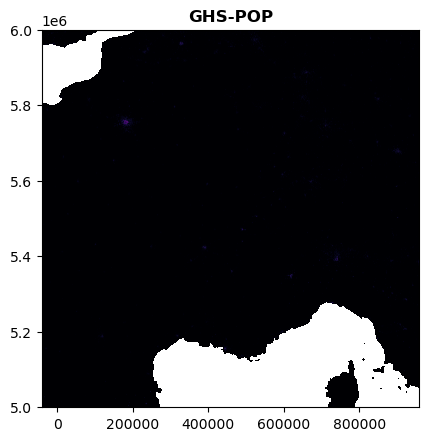

<AxesSubplot:title={'center':'GHS-POP'}>

In [27]:
# Open the raster
ghs_pop = rasterio.open(path, driver="GTiff")

# Metadata function from Rasterio
print(ghs_pop.meta)

# Plot with rasterio.plot, which provides Matplotlib functionality
plt.figure(figsize=(5, 5), dpi=100)  # adjust size and resolution
show(ghs_pop, title='GHS-POP', cmap='inferno')

### inspiration for code below found [here](https://rpubs.com/ricardo_ochoa/416712) (in R, though!)

In [33]:
# User input CRS
user_crs = "+proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"

In [36]:
# lower left:
lower_left = SpatialPoints(coords = data.frame(x = 7.8, y = 47.0), 
                                    proj4string=CRS(user_crs))
# top right: 
top_right = SpatialPoints(coords = data.frame(x = 11.0, y = 48.2), 
                                   proj4string=CRS(user_crs))

NameError: name 'SpatialPoints' is not defined

coordinates found using [bounding box](https://boundingbox.klokantech.com/)

In [ ]:
# GHSL CRS
ghsl_crs <- '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'   # for 1000m and 250m
# ghsl_crs <- '+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs' # for 38m

# If needed, R will make the transformation. 
if(as.character(crs(lower_left)) != ghsl_crs){
  lower_left <- spTransform(x = lower_left,
                            CRSobj = ghsl_crs)
}

if(as.character(crs(top_right)) != ghsl_crs){
  top_right <- spTransform(x = top_right,
                            CRSobj = ghsl_crs)
}

In [ ]:
my_extent <- extent(c(as.data.frame(lower_left)$x, 
                      as.data.frame(top_right)$x, 
                      as.data.frame(lower_left)$y, 
                      as.data.frame(top_right)$y)) 

In [ ]:
# crop raster stack based on the definition of the study area
built_up <- crop(x = raster("_input/2014.tif"),
                 y = my_extent)

### found [here](https://www.eea.europa.eu/data-and-maps/data/wise-large-rivers-and-large-lakes)
opened in QGIS and selected Lake of Constance <br> copied & pasted its MultiPolygon

In [ ]:
wkt_geom	WPEU10MV2_	WPEU10MV21	WPLKNM	Shape_Leng	Shape_Area
MultiPolygon (((4236437.90719999931752682 2727617.4232999999076128, 
                4236807.50280000083148479 2727911.74909999966621399, 
                4237144.86900000087916851 2727846.88560000061988831, 4
            237804.73919999971985817 2727636.78470000065863132, 4238373.72609999962151051 2727688.10160000063478947, 4238672.38719999976456165 2727763.6863000001758337, 4239592.83799999952316284 2727790.13370000012218952, 4240153.15310000069439411 2728182.2772000003606081, 4241319.74440000019967556 2728405.10590000078082085, 4241743.18559999950230122 2728699.4813000001013279, 4242358.4488999992609024 2729170.616499999538064, 4242752.81499999947845936 2729325.15509999915957451, 4243620.42349999956786633 2729472.61830000020563602, 4243964.66379999928176403 2729927.90709999948740005, 4244305.87609999999403954 2730163.34799999929964542, 4245135.04079999960958958 2730471.70560000091791153, 4245529.98890000022947788 2730686.71639999933540821, 4245885.78779999911785126 2731001.64780000038444996, 4246230.79700000025331974 2731537.14030000008642673, 4246425.24039999954402447 2731934.31220000050961971, 4246402.8705000001937151 2732294.87920000031590462, 4246205.40020000003278255 2732697.35639999993145466, 4245779.2244000006467104 2733183.49689999967813492, 4245216.26950000040233135 2733531.20390000008046627, 4244880.0499000009149313 2733655.90269999951124191, 4244209.72829999960958958 2734064.94270000047981739, 4243485.27319999970495701 2734455.09840000048279762, 4242909.13770000077784061 2734822.9659000001847744, 4242371.03759999945759773 2734990.68579999916255474, 4241994.6782000008970499 2735135.91799999959766865, 4241648.43950000032782555 2735501.13020000047981739, 4241753.28830000013113022 2736239.48719999939203262, 4242160.40609999932348728 2736374.02370000071823597, 4242781.98220000043511391 2736384.96739999949932098, 4243347.9330000001937151 2736277.19500000029802322, 4245015.84889999963343143 2735734.14619999937713146, 4245606.70649999938905239 2735465.62839999981224537, 4245903.17060000076889992 2735401.81110000051558018, 4246198.26820000074803829 2735237.70299999974668026, 4246652.3278999999165535 2734831.74410000070929527, 4246935.06149999983608723 2734747.91630000062286854, 4247127.71089999936521053 2735025.52410000003874302, 4246968.15029999986290932 2735227.3482000008225441, 4246393.94879999943077564 2735735.19759999960660934, 4246007.18730000033974648 2736120.46969999931752682, 4245374.65010000020265579 2736308.91789999976754189, 4245146.49660000018775463 2736412.3960999995470047, 4244948.07850000075995922 2736734.87560000084340572, 4245477.25960000045597553 2736907.54419999942183495, 4245759.75659999996423721 2736824.09799999929964542, 4246523.09320000000298023 2736313.66330000013113022, 4247284.40540000051259995 2735643.21110000088810921, 4247686.34569999948143959 2735377.93029999919235706, 4249368.18229999952018261 2734815.75329999998211861, 4249851.98110000044107437 2734609.82300000078976154, 4250174.22739999927580357 2734445.60500000044703484, 4250817.32450000010430813 2733997.07259999960660934, 4251113.19730000011622906 2733873.76070000045001507, 4251541.9455999992787838 2733568.35480000078678131, 4252242.69050000049173832 2733399.5011999998241663, 4252753.41300000064074993 2733153.04279999993741512, 4253062.04409999959170818 2732969.33709999918937683, 4253275.83740000054240227 2732766.58129999972879887, 4253862.80650000087916851 2732099.67989999987185001, 4253939.41249999962747097 2731718.71040000021457672, 4253451.1546000000089407 2731584.32599999941885471, 4252911.6647999994456768 2731691.22540000081062317, 4252519.616499999538064 2731696.05819999985396862, 4252183.13010000064969063 2731819.84579999931156635, 4251874.36089999973773956 2732004.04399999976158142, 4251286.02050000056624413 2732531.3186000008136034, 4250869.16330000013113022 2732716.43439999967813492, 4250585.41290000081062317 2732720.05980000086128712, 4250153.72010000050067902 2732785.8397000003606081, 4249511.71330000087618828 2733333.75500000081956387, 4249079.05880000069737434 2733319.58190000057220459, 4249152.06140000000596046 2732678.64030000008642673, 4249184.73200000077486038 2732058.0044999998062849, 4250055.19019999913871288 2731387.04350000061094761, 4250593.22570000030100346 2731159.80230000056326389, 4251415.71330000087618828 2730969.522299999371171, 4252495.9976000003516674 2730856.22800000011920929, 4254281.92650000005960464 2730954.50039999932050705, 4254670.15139999985694885 2730609.8726000003516674, 4254883.59840000048279762 2730367.12170000001788139, 4255015.12230000086128712 2730045.3421000000089407, 4255240.65450000017881393 2729662.65210000053048134, 4255743.53470000065863132 2728697.00269999913871288, 4256242.21829999983310699 2728531.0421999990940094, 4256852.07860000059008598 2728644.01520000025629997, 4257735.68090000003576279 2729033.69910000078380108, 4258332.43439999967813492 2729186.9907000008970499, 4258629.8198000006377697 2729163.89169999957084656, 4259275.93200000002980232 2728876.45759999938309193, 4259637.68219999969005585 2728552.21179999969899654, 4259976.79890000075101852 2728648.79089999943971634, 4260489.04289999976754189 2728483.05250000022351742, 4261569.49290000088512897 2728311.2686999998986721, 4261841.54629999957978725 2728468.45600000023841858, 4262276.14379999972879887 2728623.96409999951720238, 4261935.2431000005453825 2729667.32320000045001507, 4261889.12769999913871288 2730448.10170000046491623, 4261824.76549999974668026 2730748.78779999911785126, 4261145.65159999951720238 2731755.81409999914467335, 4260958.32399999909102917 2731938.21000000089406967, 4260300.14140000008046627 2732345.15579999983310699, 4259939.3063999991863966 2732729.15420000068843365, 4259833.70040000043809414 2732970.46050000004470348, 4259679.13460000045597553 2733671.96330000087618828, 4259682.32499999925494194 2733971.89379999972879887, 4259595.61119999922811985 2734692.91110000014305115, 4259295.25459999963641167 2735656.45119999907910824, 4259069.76999999955296516 2736039.01960000023245811, 4258709.00599999912083149 2736402.83840000070631504, 4258226.94639999978244305 2736788.34100000001490116, 4258013.24579999968409538 2737011.15650000050663948, 4257720.78700000047683716 2737434.08899999968707561, 4257387.19779999926686287 2737798.66269999928772449, 4256401.48310000076889992 2737809.5767000000923872, 4256105.63399999961256981 2737912.90289999917149544, 4255891.10610000044107437 2738055.73790000006556511, 4255690.87509999983012676 2738257.78319999948143959, 4254486.79209999926388264 2739232.79389999993145466, 4253790.51369999907910824 2739721.11150000058114529, 4252622.41569999977946281 2740255.84050000086426735, 4251551.40520000085234642 2740988.73850000090897083, 4251137.66259999945759773 2741374.00760000012814999, 4250606.56079999916255474 2742081.03549999929964542, 4250006.57450000010430813 2742668.92540000006556511, 4249704.09970000013709068 2743292.57890000008046627, 4249438.27789999917149544 2743616.25039999932050705, 4248808.32200000062584877 2743944.66850000061094761, 4248517.49249999970197678 2744408.1342999991029501, 4248738.83860000036656857 2744845.59769999980926514, 4249121.00889999978244305 2745200.39479999989271164, 4249809.52419999986886978 2745251.78240000084042549, 4250078.28759999945759773 2745168.272299999371171, 4250778.01109999977052212 2745039.23399999924004078, 4251045.8205999992787838 2744875.72609999962151051, 4251659.82080000080168247 2744348.0563999991863966, 4253195.44849999994039536 2743028.7289000004529953, 4254961.43469999916851521 2741727.35400000028312206, 4255174.9517000000923872 2741524.64189999923110008, 4255627.13849999941885471 2740939.55049999989569187, 4255997.99330000020563602 2740314.50180000066757202, 4256279.66059999912977219 2740151.09060000069439411, 4256629.87780000083148479 2740087.15080000087618828, 4257196.97309999912977219 2740100.87390000000596046, 4257667.17410000041127205 2739895.78399999998509884, 4258619.45380000025033951 2739324.56589999981224537, 4259154.44879999943077564 2738858.45670000091195107, 4260146.12319999933242798 2738167.41489999927580357, 4260683.25709999911487103 2737881.78659999929368496, 4261261.60679999925196171 2737655.62879999913275242, 4262296.54690000042319298 2737184.45890000090003014, 4262656.87580000050365925 2736760.08459999971091747, 4262853.50190000049769878 2736158.10199999995529652, 4262968.1181000005453825 2735476.88360000029206276, 4263218.29350000061094761 2734834.27080000005662441, 4263801.09759999997913837 2733667.89949999935925007, 4264428.36910000070929527 2732881.58909999951720238, 4264937.25889999978244305 2732396.10979999974370003, 4265663.03830000013113022 2731969.25459999963641167, 4266885.77769999951124191 2731176.88079999946057796, 4267583.84190000034868717 2730650.20989999920129776, 4267878.93310000002384186 2730387.44769999943673611, 4268993.76830000057816505 2729576.79509999975562096, 4269613.42860000021755695 2729311.06289999932050705, 4269897.20869999937713146 2729268.45040000043809414, 4270260.90029999986290932 2729104.95800000056624413, 4271297.40259999968111515 2728555.45099999941885471, 4272010.42280000075697899 2728109.2698999997228384, 4272630.67219999991357327 2727863.67549999989569187, 4273593.49440000019967556 2728135.54160000011324883, 4274553.93070000037550926 2728147.18490000069141388, 4275083.3681000005453825 2728382.90589999966323376, 4275517.21120000071823597 2728499.43109999969601631, 4275923.37719999998807907 2728555.84789999946951866, 4276464.37969999946653843 2728551.51329999975860119, 4277248.44239999912679195 2728485.477700000628829, 4278566.71509999968111515 2727515.02219999954104424, 4279552.70830000005662441 2727287.65300000086426735, 4279889.80650000087916851 2727125.06640000082552433, 4280508.50779999978840351 2726620.42930000089108944, 4280994.85019999928772449 2726517.06200000084936619, 4281333.54050000011920929 2726574.41249999962747097, 4281942.23409999907016754 2726550.31210000067949295, 4282267.60129999928176403 2726647.82359999977052212, 4282822.51600000075995922 2726664.25699999928474426, 4283254.55629999935626984 2726541.17659999988973141, 4283523.36840000003576279 2726259.16620000079274178, 4283804.54230000078678131 2725797.26490000076591969, 4284261.62160000018775463 2725334.59530000016093254, 4284703.59860000014305115 2724611.7265000008046627, 4284993.47739999927580357 2723369.54160000011324883, 4285181.03030000068247318 2723028.37350000068545341, 4285489.27370000071823597 2722526.80739999935030937, 4285622.83159999921917915 2722225.51600000075995922, 4285686.97100000083446503 2721665.22990000061690807, 4285792.89690000005066395 2721264.79150000028312206, 4286518.37309999950230122 2720300.13939999975264072, 4286908.89939999952912331 2719937.9671000000089407, 4287396.78050000034272671 2719975.01549999974668026, 4287775.25290000066161156 2719832.39819999970495701, 4288166.3892000000923872 2719530.12820000015199184, 4288599.59080000035464764 2719467.78490000031888485, 4289344.92889999970793724 2719523.27239999920129776, 4289968.93400000035762787 2719679.82489999942481518, 4290348.5364999994635582 2719737.48450000025331974, 4290915.80210000090301037 2719414.66489999927580357, 4291049.90699999965727329 2719154.03659999929368496, 4291817.1034999992698431 2718123.20020000077784061, 4294213.06020000018179417 2716971.60080000013113022, 4296133.13700000010430813 2716306.33589999936521053, 4297093.22360000014305115 2715973.73680000007152557, 4296431.6176999993622303 2714542.16090000048279762, 4297886.31310000084340572 2715163.23729999922215939, 4299653.98790000006556511 2715140.12690000049769878, 4300914.67469999939203262 2713203.41730000078678131, 4302024.96670000068843365 2712068.74960000067949295, 4301050.38939999975264072 2711281.37890000082552433, 4297830.06900000013411045 2710843.3875999990850687, 4296853.44490000046789646 2709896.07230000011622906, 4295567.85669999942183495 2709912.90729999914765358, 4295694.25760000012814999 2709451.58410000056028366, 4295422.27419999986886978 2709292.78109999932348728, 4295569.76359999924898148 2708912.1157000008970499, 4294592.37209999933838844 2708856.89660000056028366, 4294335.3056000005453825 2709018.21719999983906746, 4294119.15570000000298023 2709239.13079999946057796, 4293998.39509999938309193 2709539.6380000002682209, 4294095.08489999920129776 2709879.12219999916851521, 4294423.55849999934434891 2710477.40359999984502792, 4294275.81079999916255474 2710798.30230000056326389, 4293596.36500000022351742 2710581.72880000062286854, 4293310.08579999953508377 2710303.00349999964237213, 4292982.50420000031590462 2709904.92579999938607216, 4292614.54580000042915344 2709586.60879999957978725, 4291730.3794999998062849 2709171.22220000065863132, 4291294.68390000052750111 2708913.6119999997317791, 4290914.13279999978840351 2708815.84310000017285347, 4290506.9919000007212162 2708818.09979999996721745, 4290127.21570000052452087 2708860.23079999908804893, 4289829.33559999987483025 2708981.48680000007152557, 4289288.18439999967813492 2709304.67659999988973141, 4289058.50300000049173832 2709485.8842999991029501, 4288883.35490000061690807 2709706.77590000070631504, 4288749.428999999538064 2710007.97739999927580357, 4288234.10899999924004078 2710070.78020000085234642, 4287044.35170000046491623 2709544.79209999926388264, 4286714.59129999950528145 2708909.05189999938011169, 4283809.37769999913871288 2707987.20910000056028366, 4282521.71240000054240227 2707844.20140000060200691, 4281728.65320000052452087 2708654.76339999958872795, 4280622.49780000001192093 2710109.56269999966025352, 4279666.59149999916553497 2710762.28009999915957451, 4278560.40489999949932098 2712217.08650000020861626, 4277606.6465000007301569 2713029.83650000020861626, 4275697.04319999925792217 2714495.36610000021755695, 4274588.86840000003576279 2715790.25760000012814999, 4274776.76759999990463257 2717868.11219999939203262, 4273025.81340000033378601 2719171.57970000058412552, 4270953.38010000064969063 2720479.32729999907314777, 4268570.16740000061690807 2722591.45509999990463257, 4265698.51219999976456165 2724230.04639999940991402, 4262985.53460000082850456 2725706.57120000012218952, 4261065.65369999967515469 2726372.41660000011324883, 4259794.79360000044107437 2727509.67530000023543835, 4259739.053999999538064 2727879.5409999992698431, 4258613.25459999963641167 2728594.34429999999701977, 4256285.133500000461936 2727938.95099999941885471, 4255372.30150000005960464 2728670.0125999990850687, 4255269.71849999949336052 2728662.55529999919235706, 4254971.64399999938905239 2728626.05179999954998493, 4254226.61920000053942204 2728535.17789999954402447, 4253713.84689999930560589 2728641.18979999981820583, 4253417.91929999925196171 2728784.62849999964237213, 4252818.02329999953508377 2729512.0414000004529953, 4252347.0681999996304512 2729717.97419999912381172, 4252061.38649999909102917 2729581.65640000067651272, 4251763.22519999928772449 2729525.0921000000089407, 4251264.82149999961256981 2729691.44659999944269657, 4250846.58819999918341637 2729776.80289999954402447, 4249967.92180000059306622 2729807.72560000047087669, 4249603.83410000056028366 2729892.48489999957382679, 4249238.97900000028312206 2729917.45209999941289425, 4247143.77329999953508377 2730004.75520000047981739, 4246507.26630000025033951 2729933.18740000016987324, 4246276.14690000005066395 2729836.48790000006556511, 4245243.93740000016987324 2729510.46719999983906746, 4244563.52850000001490116 2729199.59830000065267086, 4244154.29639999940991402 2728945.27329999953508377, 4243853.00029999949038029 2728669.72350000031292439, 4243399.02209999971091747 2728115.65619999915361404, 4243139.58980000019073486 2727939.3953000009059906, 4242257.69089999981224537 2727751.70930000022053719, 4241729.02429999969899654 2727679.18920000083744526, 4241362.37959999963641167 2727584.57750000059604645, 4240790.91569999977946281 2727352.66169999912381172, 4240368.09789999946951866 2727119.07210000045597553, 4239934.69759999960660934 2727085.37209999933838844, 4239663.20539999939501286 2727029.03700000047683716, 4239364.43429999984800816 2726953.37360000051558018, 4238969.4561999998986721 2726779.27300000004470348, 4238372.77859999984502792 2726688.32660000026226044, 4238076.07689999975264072 2726752.55980000086128712, 4237712.80260000005364418 2726898.34280000068247318, 4237016.02250000089406967 2727368.46189999952912331, 4236760.54649999924004078 2727472.65990000031888485, 4236437.90719999931752682 2727617.4232999999076128)))

# 224 232	BODENSEE	235618.447615	502737559.773

In [ ]:
wkt_geom	WPEU10MV2_	WPEU10MV21	WPLKNM	Shape_Leng	Shape_Area
MultiPolygon (((4236437.90719999931752682 2727617.4232999999076128, 4236807.50280000083148479 2727911.74909999966621399, 4237144.86900000087916851 2727846.88560000061988831, 4237804.73919999971985817 2727636.78470000065863132, 4238373.72609999962151051 2727688.10160000063478947, 4238672.38719999976456165 2727763.6863000001758337, 4239592.83799999952316284 2727790.13370000012218952, 4240153.15310000069439411 2728182.2772000003606081, 4241319.74440000019967556 2728405.10590000078082085, 4241743.18559999950230122 2728699.4813000001013279, 4242358.4488999992609024 2729170.616499999538064, 4242752.81499999947845936 2729325.15509999915957451, 4243620.42349999956786633 2729472.61830000020563602, 4243964.66379999928176403 2729927.90709999948740005, 4244305.87609999999403954 2730163.34799999929964542, 4245135.04079999960958958 2730471.70560000091791153, 4245529.98890000022947788 2730686.71639999933540821, 4245885.78779999911785126 2731001.64780000038444996, 4246230.79700000025331974 2731537.14030000008642673, 4246425.24039999954402447 2731934.31220000050961971, 4246402.8705000001937151 2732294.87920000031590462, 4246205.40020000003278255 2732697.35639999993145466, 4245779.2244000006467104 2733183.49689999967813492, 4245216.26950000040233135 2733531.20390000008046627, 4244880.0499000009149313 2733655.90269999951124191, 4244209.72829999960958958 2734064.94270000047981739, 4243485.27319999970495701 2734455.09840000048279762, 4242909.13770000077784061 2734822.9659000001847744, 4242371.03759999945759773 2734990.68579999916255474, 4241994.6782000008970499 2735135.91799999959766865, 4241648.43950000032782555 2735501.13020000047981739, 4241753.28830000013113022 2736239.48719999939203262, 4242160.40609999932348728 2736374.02370000071823597, 4242781.98220000043511391 2736384.96739999949932098, 4243347.9330000001937151 2736277.19500000029802322, 4245015.84889999963343143 2735734.14619999937713146, 4245606.70649999938905239 2735465.62839999981224537, 4245903.17060000076889992 2735401.81110000051558018, 4246198.26820000074803829 2735237.70299999974668026, 4246652.3278999999165535 2734831.74410000070929527, 4246935.06149999983608723 2734747.91630000062286854, 4247127.71089999936521053 2735025.52410000003874302, 4246968.15029999986290932 2735227.3482000008225441, 4246393.94879999943077564 2735735.19759999960660934, 4246007.18730000033974648 2736120.46969999931752682, 4245374.65010000020265579 2736308.91789999976754189, 4245146.49660000018775463 2736412.3960999995470047, 4244948.07850000075995922 2736734.87560000084340572, 4245477.25960000045597553 2736907.54419999942183495, 4245759.75659999996423721 2736824.09799999929964542, 4246523.09320000000298023 2736313.66330000013113022, 4247284.40540000051259995 2735643.21110000088810921, 4247686.34569999948143959 2735377.93029999919235706, 4249368.18229999952018261 2734815.75329999998211861, 4249851.98110000044107437 2734609.82300000078976154, 4250174.22739999927580357 2734445.60500000044703484, 4250817.32450000010430813 2733997.07259999960660934, 4251113.19730000011622906 2733873.76070000045001507, 4251541.9455999992787838 2733568.35480000078678131, 4252242.69050000049173832 2733399.5011999998241663, 4252753.41300000064074993 2733153.04279999993741512, 4253062.04409999959170818 2732969.33709999918937683, 4253275.83740000054240227 2732766.58129999972879887, 4253862.80650000087916851 2732099.67989999987185001, 4253939.41249999962747097 2731718.71040000021457672, 4253451.1546000000089407 2731584.32599999941885471, 4252911.6647999994456768 2731691.22540000081062317, 4252519.616499999538064 2731696.05819999985396862, 4252183.13010000064969063 2731819.84579999931156635, 4251874.36089999973773956 2732004.04399999976158142, 4251286.02050000056624413 2732531.3186000008136034, 4250869.16330000013113022 2732716.43439999967813492, 4250585.41290000081062317 2732720.05980000086128712, 4250153.72010000050067902 2732785.8397000003606081, 4249511.71330000087618828 2733333.75500000081956387, 4249079.05880000069737434 2733319.58190000057220459, 4249152.06140000000596046 2732678.64030000008642673, 4249184.73200000077486038 2732058.0044999998062849, 4250055.19019999913871288 2731387.04350000061094761, 4250593.22570000030100346 2731159.80230000056326389, 4251415.71330000087618828 2730969.522299999371171, 4252495.9976000003516674 2730856.22800000011920929, 4254281.92650000005960464 2730954.50039999932050705, 4254670.15139999985694885 2730609.8726000003516674, 4254883.59840000048279762 2730367.12170000001788139, 4255015.12230000086128712 2730045.3421000000089407, 4255240.65450000017881393 2729662.65210000053048134, 4255743.53470000065863132 2728697.00269999913871288, 4256242.21829999983310699 2728531.0421999990940094, 4256852.07860000059008598 2728644.01520000025629997, 4257735.68090000003576279 2729033.69910000078380108, 4258332.43439999967813492 2729186.9907000008970499, 4258629.8198000006377697 2729163.89169999957084656, 4259275.93200000002980232 2728876.45759999938309193, 4259637.68219999969005585 2728552.21179999969899654, 4259976.79890000075101852 2728648.79089999943971634, 4260489.04289999976754189 2728483.05250000022351742, 4261569.49290000088512897 2728311.2686999998986721, 4261841.54629999957978725 2728468.45600000023841858, 4262276.14379999972879887 2728623.96409999951720238, 4261935.2431000005453825 2729667.32320000045001507, 4261889.12769999913871288 2730448.10170000046491623, 4261824.76549999974668026 2730748.78779999911785126, 4261145.65159999951720238 2731755.81409999914467335, 4260958.32399999909102917 2731938.21000000089406967, 4260300.14140000008046627 2732345.15579999983310699, 4259939.3063999991863966 2732729.15420000068843365, 4259833.70040000043809414 2732970.46050000004470348, 4259679.13460000045597553 2733671.96330000087618828, 4259682.32499999925494194 2733971.89379999972879887, 4259595.61119999922811985 2734692.91110000014305115, 4259295.25459999963641167 2735656.45119999907910824, 4259069.76999999955296516 2736039.01960000023245811, 4258709.00599999912083149 2736402.83840000070631504, 4258226.94639999978244305 2736788.34100000001490116, 4258013.24579999968409538 2737011.15650000050663948, 4257720.78700000047683716 2737434.08899999968707561, 4257387.19779999926686287 2737798.66269999928772449, 4256401.48310000076889992 2737809.5767000000923872, 4256105.63399999961256981 2737912.90289999917149544, 4255891.10610000044107437 2738055.73790000006556511, 4255690.87509999983012676 2738257.78319999948143959, 4254486.79209999926388264 2739232.79389999993145466, 4253790.51369999907910824 2739721.11150000058114529, 4252622.41569999977946281 2740255.84050000086426735, 4251551.40520000085234642 2740988.73850000090897083, 4251137.66259999945759773 2741374.00760000012814999, 4250606.56079999916255474 2742081.03549999929964542, 4250006.57450000010430813 2742668.92540000006556511, 4249704.09970000013709068 2743292.57890000008046627, 4249438.27789999917149544 2743616.25039999932050705, 4248808.32200000062584877 2743944.66850000061094761, 4248517.49249999970197678 2744408.1342999991029501, 4248738.83860000036656857 2744845.59769999980926514, 4249121.00889999978244305 2745200.39479999989271164, 4249809.52419999986886978 2745251.78240000084042549, 4250078.28759999945759773 2745168.272299999371171, 4250778.01109999977052212 2745039.23399999924004078, 4251045.8205999992787838 2744875.72609999962151051, 4251659.82080000080168247 2744348.0563999991863966, 4253195.44849999994039536 2743028.7289000004529953, 4254961.43469999916851521 2741727.35400000028312206, 4255174.9517000000923872 2741524.64189999923110008, 4255627.13849999941885471 2740939.55049999989569187, 4255997.99330000020563602 2740314.50180000066757202, 4256279.66059999912977219 2740151.09060000069439411, 4256629.87780000083148479 2740087.15080000087618828, 4257196.97309999912977219 2740100.87390000000596046, 4257667.17410000041127205 2739895.78399999998509884, 4258619.45380000025033951 2739324.56589999981224537, 4259154.44879999943077564 2738858.45670000091195107, 4260146.12319999933242798 2738167.41489999927580357, 4260683.25709999911487103 2737881.78659999929368496, 4261261.60679999925196171 2737655.62879999913275242, 4262296.54690000042319298 2737184.45890000090003014, 4262656.87580000050365925 2736760.08459999971091747, 4262853.50190000049769878 2736158.10199999995529652, 4262968.1181000005453825 2735476.88360000029206276, 4263218.29350000061094761 2734834.27080000005662441, 4263801.09759999997913837 2733667.89949999935925007, 4264428.36910000070929527 2732881.58909999951720238, 4264937.25889999978244305 2732396.10979999974370003, 4265663.03830000013113022 2731969.25459999963641167, 4266885.77769999951124191 2731176.88079999946057796, 4267583.84190000034868717 2730650.20989999920129776, 4267878.93310000002384186 2730387.44769999943673611, 4268993.76830000057816505 2729576.79509999975562096, 4269613.42860000021755695 2729311.06289999932050705, 4269897.20869999937713146 2729268.45040000043809414, 4270260.90029999986290932 2729104.95800000056624413, 4271297.40259999968111515 2728555.45099999941885471, 4272010.42280000075697899 2728109.2698999997228384, 4272630.67219999991357327 2727863.67549999989569187, 4273593.49440000019967556 2728135.54160000011324883, 4274553.93070000037550926 2728147.18490000069141388, 4275083.3681000005453825 2728382.90589999966323376, 4275517.21120000071823597 2728499.43109999969601631, 4275923.37719999998807907 2728555.84789999946951866, 4276464.37969999946653843 2728551.51329999975860119, 4277248.44239999912679195 2728485.477700000628829, 4278566.71509999968111515 2727515.02219999954104424, 4279552.70830000005662441 2727287.65300000086426735, 4279889.80650000087916851 2727125.06640000082552433, 4280508.50779999978840351 2726620.42930000089108944, 4280994.85019999928772449 2726517.06200000084936619, 4281333.54050000011920929 2726574.41249999962747097, 4281942.23409999907016754 2726550.31210000067949295, 4282267.60129999928176403 2726647.82359999977052212, 4282822.51600000075995922 2726664.25699999928474426, 4283254.55629999935626984 2726541.17659999988973141, 4283523.36840000003576279 2726259.16620000079274178, 4283804.54230000078678131 2725797.26490000076591969, 4284261.62160000018775463 2725334.59530000016093254, 4284703.59860000014305115 2724611.7265000008046627, 4284993.47739999927580357 2723369.54160000011324883, 4285181.03030000068247318 2723028.37350000068545341, 4285489.27370000071823597 2722526.80739999935030937, 4285622.83159999921917915 2722225.51600000075995922, 4285686.97100000083446503 2721665.22990000061690807, 4285792.89690000005066395 2721264.79150000028312206, 4286518.37309999950230122 2720300.13939999975264072, 4286908.89939999952912331 2719937.9671000000089407, 4287396.78050000034272671 2719975.01549999974668026, 4287775.25290000066161156 2719832.39819999970495701, 4288166.3892000000923872 2719530.12820000015199184, 4288599.59080000035464764 2719467.78490000031888485, 4289344.92889999970793724 2719523.27239999920129776, 4289968.93400000035762787 2719679.82489999942481518, 4290348.5364999994635582 2719737.48450000025331974, 4290915.80210000090301037 2719414.66489999927580357, 4291049.90699999965727329 2719154.03659999929368496, 4291817.1034999992698431 2718123.20020000077784061, 4294213.06020000018179417 2716971.60080000013113022, 4296133.13700000010430813 2716306.33589999936521053, 4297093.22360000014305115 2715973.73680000007152557, 4296431.6176999993622303 2714542.16090000048279762, 4297886.31310000084340572 2715163.23729999922215939, 4299653.98790000006556511 2715140.12690000049769878, 4300914.67469999939203262 2713203.41730000078678131, 4302024.96670000068843365 2712068.74960000067949295, 4301050.38939999975264072 2711281.37890000082552433, 4297830.06900000013411045 2710843.3875999990850687, 4296853.44490000046789646 2709896.07230000011622906, 4295567.85669999942183495 2709912.90729999914765358, 4295694.25760000012814999 2709451.58410000056028366, 4295422.27419999986886978 2709292.78109999932348728, 4295569.76359999924898148 2708912.1157000008970499, 4294592.37209999933838844 2708856.89660000056028366, 4294335.3056000005453825 2709018.21719999983906746, 4294119.15570000000298023 2709239.13079999946057796, 4293998.39509999938309193 2709539.6380000002682209, 4294095.08489999920129776 2709879.12219999916851521, 4294423.55849999934434891 2710477.40359999984502792, 4294275.81079999916255474 2710798.30230000056326389, 4293596.36500000022351742 2710581.72880000062286854, 4293310.08579999953508377 2710303.00349999964237213, 4292982.50420000031590462 2709904.92579999938607216, 4292614.54580000042915344 2709586.60879999957978725, 4291730.3794999998062849 2709171.22220000065863132, 4291294.68390000052750111 2708913.6119999997317791, 4290914.13279999978840351 2708815.84310000017285347, 4290506.9919000007212162 2708818.09979999996721745, 4290127.21570000052452087 2708860.23079999908804893, 4289829.33559999987483025 2708981.48680000007152557, 4289288.18439999967813492 2709304.67659999988973141, 4289058.50300000049173832 2709485.8842999991029501, 4288883.35490000061690807 2709706.77590000070631504, 4288749.428999999538064 2710007.97739999927580357, 4288234.10899999924004078 2710070.78020000085234642, 4287044.35170000046491623 2709544.79209999926388264, 4286714.59129999950528145 2708909.05189999938011169, 4283809.37769999913871288 2707987.20910000056028366, 4282521.71240000054240227 2707844.20140000060200691, 4281728.65320000052452087 2708654.76339999958872795, 4280622.49780000001192093 2710109.56269999966025352, 4279666.59149999916553497 2710762.28009999915957451, 4278560.40489999949932098 2712217.08650000020861626, 4277606.6465000007301569 2713029.83650000020861626, 4275697.04319999925792217 2714495.36610000021755695, 4274588.86840000003576279 2715790.25760000012814999, 4274776.76759999990463257 2717868.11219999939203262, 4273025.81340000033378601 2719171.57970000058412552, 4270953.38010000064969063 2720479.32729999907314777, 4268570.16740000061690807 2722591.45509999990463257, 4265698.51219999976456165 2724230.04639999940991402, 4262985.53460000082850456 2725706.57120000012218952, 4261065.65369999967515469 2726372.41660000011324883, 4259794.79360000044107437 2727509.67530000023543835, 4259739.053999999538064 2727879.5409999992698431, 4258613.25459999963641167 2728594.34429999999701977, 4256285.133500000461936 2727938.95099999941885471, 4255372.30150000005960464 2728670.0125999990850687, 4255269.71849999949336052 2728662.55529999919235706, 4254971.64399999938905239 2728626.05179999954998493, 4254226.61920000053942204 2728535.17789999954402447, 4253713.84689999930560589 2728641.18979999981820583, 4253417.91929999925196171 2728784.62849999964237213, 4252818.02329999953508377 2729512.0414000004529953, 4252347.0681999996304512 2729717.97419999912381172, 4252061.38649999909102917 2729581.65640000067651272, 4251763.22519999928772449 2729525.0921000000089407, 4251264.82149999961256981 2729691.44659999944269657, 4250846.58819999918341637 2729776.80289999954402447, 4249967.92180000059306622 2729807.72560000047087669, 4249603.83410000056028366 2729892.48489999957382679, 4249238.97900000028312206 2729917.45209999941289425, 4247143.77329999953508377 2730004.75520000047981739, 4246507.26630000025033951 2729933.18740000016987324, 4246276.14690000005066395 2729836.48790000006556511, 4245243.93740000016987324 2729510.46719999983906746, 4244563.52850000001490116 2729199.59830000065267086, 4244154.29639999940991402 2728945.27329999953508377, 4243853.00029999949038029 2728669.72350000031292439, 4243399.02209999971091747 2728115.65619999915361404, 4243139.58980000019073486 2727939.3953000009059906, 4242257.69089999981224537 2727751.70930000022053719, 4241729.02429999969899654 2727679.18920000083744526, 4241362.37959999963641167 2727584.57750000059604645, 4240790.91569999977946281 2727352.66169999912381172, 4240368.09789999946951866 2727119.07210000045597553, 4239934.69759999960660934 2727085.37209999933838844, 4239663.20539999939501286 2727029.03700000047683716, 4239364.43429999984800816 2726953.37360000051558018, 4238969.4561999998986721 2726779.27300000004470348, 4238372.77859999984502792 2726688.32660000026226044, 4238076.07689999975264072 2726752.55980000086128712, 4237712.80260000005364418 2726898.34280000068247318, 4237016.02250000089406967 2727368.46189999952912331, 4236760.54649999924004078 2727472.65990000031888485, 4236437.90719999931752682 2727617.4232999999076128)))	
# 224	232	BODENSEE	235618.447615	502737559.773

### [this](https://towardsdatascience.com/creating-beautiful-population-density-maps-with-python-fcdd84035e06) could be very useful as well
From @PythonMaps' Adam Symington, who was interviewed on MapScaping a while ago 

--> see the other ipynb